# Naive Bayes Classification

- A probabilistic classification algorithm based on Bayes' theorem.
- Assumes that all features are independent (naive assumption).
- There are three types of classifiers depending on input features:
  * Gaussian Naive Bayes Classifier
  * Bernoulli Naive Bayes Classifier
  * Multinomial Naive Bayes Classifier


## Probability Model of Naive Bayes Classifier

- Naive Bayes is a conditional probability model.
- It takes an input vector **x** representing *N* features and outputs k possible probabilistic results.


\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* Applying Bayes' theorem to the above equation, we have:

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* Since only the numerator affects the output, the denominator part can be treated as a constant.


\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* Using the chain rule, the equation can be written as follows:

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* Since the Naive Bayes classifier assumes that all features are independent, the equation can be written as follows:


\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* Among the values obtained from the above equation, the class with the highest value is considered the predicted result.


\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

In [5]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [7]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2 ]]

idx = 0
for c, xs in zip(prior, likelihood):
  result =1.

  for x in xs:
    result *= x
  result *= c

  idx += 1
  print(f"{idx}th class likelihood: {result}")

1th class likelihood: 0.0162
2th class likelihood: 0.0042
3th class likelihood: 0.0039375
4th class likelihood: 0.0024000000000000002


# Forest Soil Data

- Characteristics data of soil in forested areas.
- Predicting the type of soil to which it belongs.
- Detailed description of the data can be found at https://archive.ics.uci.edu/ml/datasets/Covertype.


In [8]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [ ]:
pd.DataFrame(covtype.data)

In [ ]:
covtype.targets

### Splitting the Training and Evaluation Data


In [9]:
covtype_X = covtype.data
covtype_y = covtype.target

In [13]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.2)

### Preprocessing

In [16]:
scaler = StandardScaler()
covtype_X_train_scale = scaler.fit_transform(covtype_X_train)
covtype_X_test_scale = scaler.fit_transform(covtype_X_test)


# 20 Newsgroup Data

- Classifying news articles into different groups.
- Since news articles are text data, they require special preprocessing.


In [17]:
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

# Gaussian Naive Bayes

* Assumes that input features follow a Gaussian (normal) distribution.


In [18]:
model = GaussianNB()
model.fit(covtype_X_train_scale, covtype_y_train)

GaussianNB()

In [21]:
predict = model.predict(covtype_X_train_scale)
acc = metrics.accuracy_score(covtype_y_train, predict)
f1 = metrics.f1_score(covtype_y_train, predict, average=None)

print('Accuracy: {}'.format(acc))
print('F1 score: {}'.format(f1))


Accuracy: 0.08784253316953845
F1 score: [0.04005353 0.01822254 0.33357739 0.13774434 0.04298446 0.07215521
 0.23563822]


In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [24]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

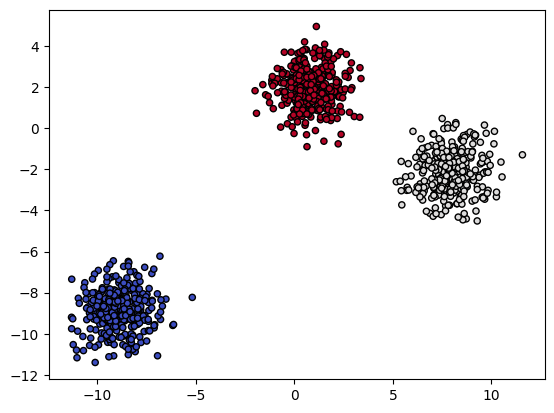

In [25]:
X, y = make_blobs(n_samples=1000)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

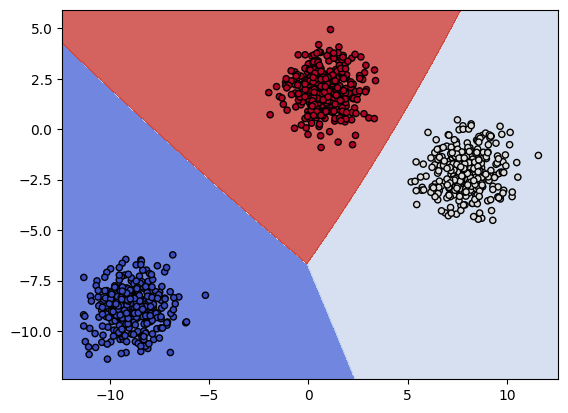

In [27]:
model=GaussianNB()
model.fit(X,y)

xx, yy = make_meshgrid(X[:,], X[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Bernoulli Naive Bayes

* Assumes that input features have binary values generated by a Bernoulli distribution.


# Multinomial Naive Bayes

* Assumes that input features have frequency values generated by a multinomial distribution.
